In [8]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from cmocean import cm as cmo
plt.style.use('seaborn-poster')
plt.style.use('ggplot')

import numpy as np
import pandas as pd
import xarray as xr
import scipy
import glob
import matplotlib.dates as mdates
import datetime
import dask.array as da

In [9]:
Gdata = "http://tds.marine.rutgers.edu/thredds/dodsC/cool/glider/mab/Gridded/20070523T0000_20070619T0000_muri_ru17.nc"

In [10]:
df = xr.open_dataset(Gdata)

In [11]:
df

<xarray.Dataset>
Dimensions:                    (depth: 60, profile: 2862)
Coordinates:
  * depth                      (depth) float64 -1.0 -3.0 -5.0 ... -117.0 -119.0
Dimensions without coordinates: profile
Data variables:
    lat                        (profile) float64 ...
    lon                        (profile) float64 ...
    time                       (profile) datetime64[ns] ...
    salinity                   (profile, depth) float64 ...
    temperature                (profile, depth) float64 ...
    salinity_raw               (profile, depth) float64 ...
    temperature_raw            (profile, depth) float64 ...
    brunt_vaisala_squared      (profile, depth) float64 ...
    brunt_vaisala_squared_raw  (profile, depth) float64 ...
    data_quality_flag          (profile, depth) float64 ...
    bb470                      (profile, depth) float64 ...
    bb532                      (profile, depth) float64 ...
    bb660                      (profile, depth) float64 ...
    bb880                      (profile, depth) float64 ...
    chla                       (profile, depth) float64 ...
    cdom                       (profile, depth) float64 ...
Attributes:
    Title:                           RU glider data on standard depths
    Conventions:                     CF-1.0
    Institution:                     Institute for Marine and Coastal Science...
    source:                          /home/coolgroup/gliderData/archive/
    castfile:                        /home/coolgroup/gliderData/archive/07052...
    casttype:                        DOWN
    project:                         muri
    glider:                          ru17
    ascii_file:                      ru17_2007_142_9_0_sbd
    history:                         Created by /home/hunter/work/matlab/glid...
    DODS_EXTRA.Unlimited_Dimension:  profile

In [12]:
df['mdate'] = mdates.date2num(df.time)

In [13]:
print(df.mdate.shape, df.depth.shape)

D, MDATE = np.meshgrid(df.depth.values,df.mdate.values)

(2862,) (60,)


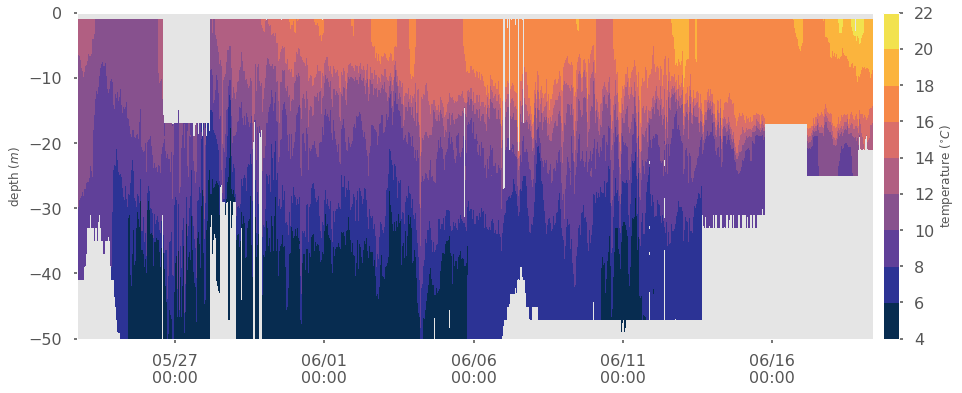

In [14]:
plt.figure(figsize=(17,6))
plt.contourf(MDATE, D, df.temperature, cmap=cmo.thermal)
plt.colorbar(label='temperature ($^{\circ}C$)',pad=0.01)
plt.ylim([-50,0])
plt.ylabel('depth ($m$)')
myFmt = mdates.DateFormatter('%m/%d\n%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.grid()
plt.show()